## Multi-Label Movies Genre Classification using ML


In [1]:
# Load EDA Pkgs
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load ML Pkgs
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
# Pipeline
from sklearn.pipeline import Pipeline
# Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

In [5]:
!pip install scikit-multilearn scikit-learn pandas numpy seaborn matplotlib

     |████████████████████████████████| 89 kB 7.7 MB/s eta 0:00:011


In [6]:
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

In [7]:
# Load Dataset
df = pd.read_csv("data/movies-dataset-final.csv")

#### Task/Workflow
+ Data Prep
+ EDA
+ Feature Engineering/Vectorization
+ Build Model/Pipeline
+ Evaluate
+ Productionize
+Interpret *

In [8]:
# Preview
df.head()

,Unnamed: 0,movie_id,plot,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",/m/076w2lb,Taxi Blues,1990-09-07,NaN,110.0,"{""/m/06b_j"": ""Russian Language""}","{""/m/0f8l9c"": ""France"", ""/m/05vz3zq"": ""Soviet ...","{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci..."
1,1,31186339,The nation of Panem consists of a wealthy Capi...,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
2,2,20663735,Poovalli Induchoodan is sentenced for six yea...,/m/051zjwb,Narasimham,2000,NaN,175.0,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""..."
3,3,2231378,"The Lemon Drop Kid , a New York City swindler,...",/m/06xtz3,The Lemon Drop Kid,1951-03-08,2300000.0,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""..."
4,4,595909,Seventh-day Adventist Church pastor Michael Ch...,/m/02tqm5,A Cry in the Dark,1988-11-03,6908797.0,121.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."


In [9]:
# Columns
df.columns

Index(['Unnamed: 0', 'movie_id', 'plot', 'freebase_movie_id', 'movie_name',
       'movie_release_date', 'movie_box_office_revenue', 'movie_runtime',
       'movie_languages', 'movie_countries', 'movie_genres'],
      dtype='object')

In [10]:
df = df[['movie_id', 'plot','movie_genres']]

In [11]:
df.head()

,movie_id,plot,movie_genres
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...","{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci..."
1,31186339,The nation of Panem consists of a wealthy Capi...,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""..."
3,2231378,"The Lemon Drop Kid , a New York City swindler,...","{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."


In [12]:
# Text Preprocessing
df['movie_genres'].iloc[0]

'{"/m/07s9rl0": "Drama", "/m/03q4nz": "World cinema"}'

In [13]:
# Convert from json to tuple/list
import json

In [14]:
json.loads(df['movie_genres'].iloc[0]).values()

dict_values(['Drama', 'World cinema'])

In [15]:
df['movie_genres'] = df['movie_genres'].apply(lambda x: json.loads(x).values())

In [16]:
df.head()

,movie_id,plot,movie_genres
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...","(Drama, World cinema)"
1,31186339,The nation of Panem consists of a wealthy Capi...,"(Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,"(Musical, Action, Drama, Bollywood)"
3,2231378,"The Lemon Drop Kid , a New York City swindler,...","(Screwball comedy, Comedy)"
4,595909,Seventh-day Adventist Church pastor Michael Ch...,"(Crime Fiction, Drama, Docudrama, World cinema..."


#### Tasks
+ Frequency of Tags/Labe
+ Most common tags
+ Structure as Multilabel

In [23]:
genres = df['movie_genres'].apply(list).tolist()

In [24]:
df['movie_genres'].value_counts()

(Short Film, Silent film, Comedy film, Animation)                                                                              1
(Drama)                                                                                                                        1
(Short Film, Animation)                                                                                                        1
(Thriller, Mystery, Action)                                                                                                    1
(Horror, Indie, Teen, Slasher)                                                                                                 1
                                                                                                                              ..
(Sword and sorcery films, Fantasy Adventure, Adventure, Costume drama, Action/Adventure, Fantasy, Sword and sorcery, Indie)    1
(Natural horror films, B-movie, Horror)                                                          

In [25]:
genres = [ word for i in genres for word in i]

In [26]:
genres

['Drama',
 'World cinema',
 'Action/Adventure',
 'Science Fiction',
 'Action',
 'Drama',
 'Musical',
 'Action',
 'Drama',
 'Bollywood',
 'Screwball comedy',
 'Comedy',
 'Crime Fiction',
 'Drama',
 'Docudrama',
 'World cinema',
 'Courtroom Drama',
 'Thriller',
 'Action/Adventure',
 'Action',
 'Drama',
 'Thriller',
 'Drama',
 'Horror',
 'Drama',
 'Teen',
 'Romantic comedy',
 'Media Satire',
 'Americana',
 'Comedy-drama',
 'Black-and-white',
 'Drama',
 'Comedy',
 'Romance Film',
 'Short Film',
 'Family Film',
 'Animation',
 'Comedy',
 'Crime Fiction',
 'Drama',
 'Comedy',
 'World cinema',
 'Parody',
 'Comedy',
 'War film',
 'Epic',
 'Action/Adventure',
 'Period piece',
 'Drama',
 'Film adaptation',
 'Action',
 'Political drama',
 'Cult',
 'Coming of age',
 'Comedy',
 'Teen',
 'Horror',
 'Thriller',
 'Mystery',
 'Comedy film',
 'Crime Fiction',
 'Horror',
 'Drama',
 'Thriller',
 'Crime Fiction',
 'Indie',
 'Martial Arts Film',
 'Romance Film',
 'Action',
 'Period piece',
 'Drama',
 'Indie'

In [27]:
# Get Frequency
from collections import Counter

In [28]:
movie_freq = Counter(genres)

In [29]:
movie_freq.most_common(10)

[('Drama', 19134),
 ('Comedy', 10467),
 ('Romance Film', 6666),
 ('Thriller', 6530),
 ('Action', 5868),
 ('World cinema', 5153),
 ('Crime Fiction', 4275),
 ('Horror', 4082),
 ('Black-and-white', 3731),
 ('Indie', 3668)]

In [30]:
movie_freq_df = pd.DataFrame(movie_freq.most_common(10),columns=['token','count'])

In [31]:
movie_freq_df

,token,count
0,Drama,19134
1,Comedy,10467
2,Romance Film,6666
3,Thriller,6530
4,Action,5868
5,World cinema,5153
6,Crime Fiction,4275
7,Horror,4082
8,Black-and-white,3731
9,Indie,3668


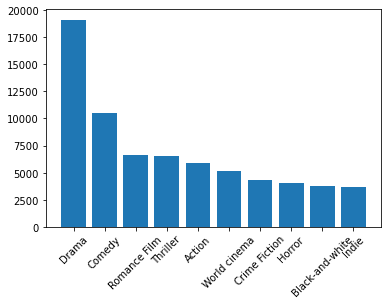

In [32]:
plt.bar(x=movie_freq_df['token'],height=movie_freq_df['count'])
plt.xticks(rotation=45)
plt.show()

In [33]:
df.head()

,movie_id,plot,movie_genres
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...","(Drama, World cinema)"
1,31186339,The nation of Panem consists of a wealthy Capi...,"(Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,"(Musical, Action, Drama, Bollywood)"
3,2231378,"The Lemon Drop Kid , a New York City swindler,...","(Screwball comedy, Comedy)"
4,595909,Seventh-day Adventist Church pastor Michael Ch...,"(Crime Fiction, Drama, Docudrama, World cinema..."


In [34]:
# Total number of unique genres
len(set(genres))

363

In [35]:
# Select only two labels
df['genre_count'] = df['movie_genres'].str.len()

In [36]:
# Pick only two labels/tags
df2 = df[df['genre_count'] == 2]

In [37]:
df2

,movie_id,plot,movie_genres,genre_count
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...","(Drama, World cinema)",2
3,2231378,"The Lemon Drop Kid , a New York City swindler,...","(Screwball comedy, Comedy)",2
7,24225279,"The story begins with Hannah, a young Jewish t...","(Drama, Teen)",2
12,2940516,Bumbling pirate crewman kills his captain aft...,"(Parody, Comedy)",2
20,15585766,Three friends are droving cattle in Australia ...,"(Drama, War film)",2
...,...,...,...,...
42182,29380772,A music group go to stay at the childhood home...,"(Musical, World cinema)",2
42186,8605430,The story develops around the evolution of Tit...,"(Drama, Art film)",2
42189,25758881,"The story, set in late 1941, follows Los Angel...","(Action, Drama)",2
42191,24318106,"Samy , a Brahmin boy and his friend Karuna gr...","(Action, Drama)",2


In [38]:
print("Original",df.shape)
print("Only 2 Tags",df2.shape)

Original (42204, 4)
Only 2 Tags (7440, 4)


In [39]:
df2.head()

,movie_id,plot,movie_genres,genre_count
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...","(Drama, World cinema)",2
3,2231378,"The Lemon Drop Kid , a New York City swindler,...","(Screwball comedy, Comedy)",2
7,24225279,"The story begins with Hannah, a young Jewish t...","(Drama, Teen)",2
12,2940516,Bumbling pirate crewman kills his captain aft...,"(Parody, Comedy)",2
20,15585766,Three friends are droving cattle in Australia ...,"(Drama, War film)",2


In [58]:
movie_freq.most_common(5)

[('Drama', 78266),
 ('Comedy', 46793),
 ('Thriller', 33783),
 ('Romance Film', 32183),
 ('Action', 29500)]

In [63]:
# Select Only top
df2['genres'] = df2['movie_genres'].apply(list).apply(str)

<ipython-input-63-85fd9c29d0c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['genres'] = df2['movie_genres'].apply(list).apply(str)


In [65]:
df2['genres']

0             ['Drama', 'World cinema']
3        ['Screwball comedy', 'Comedy']
7                     ['Drama', 'Teen']
12                 ['Parody', 'Comedy']
20                ['Drama', 'War film']
                      ...              
42182       ['Musical', 'World cinema']
42186             ['Drama', 'Art film']
42189               ['Action', 'Drama']
42191               ['Action', 'Drama']
42198           ['Comedy', 'Slapstick']
Name: genres, Length: 7440, dtype: object

In [75]:
df2['movie_genres']

0             (Drama, World cinema)
3        (Screwball comedy, Comedy)
7                     (Drama, Teen)
12                 (Parody, Comedy)
20                (Drama, War film)
                    ...            
42182       (Musical, World cinema)
42186             (Drama, Art film)
42189               (Action, Drama)
42191               (Action, Drama)
42198           (Comedy, Slapstick)
Name: movie_genres, Length: 7440, dtype: object

In [76]:
# Method 1: using list
pd.DataFrame(df2['movie_genres'].tolist())

,0,1
0,Drama,World cinema
1,Screwball comedy,Comedy
2,Drama,Teen
3,Parody,Comedy
4,Drama,War film
...,...,...
7435,Musical,World cinema
7436,Drama,Art film
7437,Action,Drama
7438,Action,Drama


In [77]:
# Method 2: using a series
df2['movie_genres'].apply(pd.Series)

,0,1
0,Drama,World cinema
3,Screwball comedy,Comedy
7,Drama,Teen
12,Parody,Comedy
20,Drama,War film
...,...,...
42182,Musical,World cinema
42186,Drama,Art film
42189,Action,Drama
42191,Action,Drama


In [78]:
# Method 2: using a series
df2[['genre1','genre2']] = df2['movie_genres'].apply(pd.Series)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [79]:
df2.head()

,movie_id,plot,movie_genres,genre_count,genres,genre1,genre2
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...","(Drama, World cinema)",2,"['Drama', 'World cinema']",Drama,World cinema
3,2231378,"The Lemon Drop Kid , a New York City swindler,...","(Screwball comedy, Comedy)",2,"['Screwball comedy', 'Comedy']",Screwball comedy,Comedy
7,24225279,"The story begins with Hannah, a young Jewish t...","(Drama, Teen)",2,"['Drama', 'Teen']",Drama,Teen
12,2940516,Bumbling pirate crewman kills his captain aft...,"(Parody, Comedy)",2,"['Parody', 'Comedy']",Parody,Comedy
20,15585766,Three friends are droving cattle in Australia ...,"(Drama, War film)",2,"['Drama', 'War film']",Drama,War film


In [80]:
# Fetch only top tags (5 tags)
df_drama = df2[df2['genre1'] == "Drama"]

,movie_id,plot,movie_genres,genre_count,genres,genre1,genre2
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...","(Drama, World cinema)",2,"['Drama', 'World cinema']",Drama,World cinema
7,24225279,"The story begins with Hannah, a young Jewish t...","(Drama, Teen)",2,"['Drama', 'Teen']",Drama,Teen
20,15585766,Three friends are droving cattle in Australia ...,"(Drama, War film)",2,"['Drama', 'War film']",Drama,War film
24,9252321,This story of a Zulu family is a composite sto...,"(Drama, Documentary)",2,"['Drama', 'Documentary']",Drama,Documentary
32,18549958,"Mary was a lonely and poor child, from a famil...","(Drama, Biopic [feature])",2,"['Drama', 'Biopic [feature]']",Drama,Biopic [feature]
...,...,...,...,...,...,...,...
42056,748616,"The film is divided into five segments , each ...","(Drama, World cinema)",2,"['Drama', 'World cinema']",Drama,World cinema
42093,26587817,"The story of Colours is based in Coonnoor, whe...","(Drama, Comedy)",2,"['Drama', 'Comedy']",Drama,Comedy
42107,9093781,"The students want reduced student bus fares, ...","(Drama, Indie)",2,"['Drama', 'Indie']",Drama,Indie
42170,13348400,Jennie Lee is the lead singer of an all-girl ...,"(Drama, Comedy)",2,"['Drama', 'Comedy']",Drama,Comedy


In [82]:
# Commonest Tags
tags = list(dict(movie_freq.most_common(5)).keys())

In [83]:
tags

['Drama', 'Comedy', 'Thriller', 'Romance Film', 'Action']

In [84]:
df2[df2['genre2'].isin(tags)]

,movie_id,plot,movie_genres,genre_count,genres,genre1,genre2
3,2231378,"The Lemon Drop Kid , a New York City swindler,...","(Screwball comedy, Comedy)",2,"['Screwball comedy', 'Comedy']",Screwball comedy,Comedy
12,2940516,Bumbling pirate crewman kills his captain aft...,"(Parody, Comedy)",2,"['Parody', 'Comedy']",Parody,Comedy
44,14330027,"Paschalis is a 30 year old agronomist, about ...","(Romance Film, Comedy)",2,"['Romance Film', 'Comedy']",Romance Film,Comedy
47,33417831,Five men attend the same gym in Berlin. None o...,"(Comedy film, Comedy)",2,"['Comedy film', 'Comedy']",Comedy film,Comedy
68,455089,"Staff Sgt. Raphael ""Jinji"" Moked is ordered by...","(Cult, Comedy)",2,"['Cult', 'Comedy']",Cult,Comedy
...,...,...,...,...,...,...,...
42169,18849330,King Rajendra Varman and Queen Mrinalini are r...,"(Romance Film, Drama)",2,"['Romance Film', 'Drama']",Romance Film,Drama
42170,13348400,Jennie Lee is the lead singer of an all-girl ...,"(Drama, Comedy)",2,"['Drama', 'Comedy']",Drama,Comedy
42173,27252164,"On a cruise ship, Mrs Marwood becomes involved...","(Crime Fiction, Drama)",2,"['Crime Fiction', 'Drama']",Crime Fiction,Drama
42189,25758881,"The story, set in late 1941, follows Los Angel...","(Action, Drama)",2,"['Action', 'Drama']",Action,Drama


In [ ]:
# Check if values are in tags for genre1 and genre2


In [86]:
df2[(df2['genre1'].isin(tags)) & (df2['genre2'].isin(tags))]

,movie_id,plot,movie_genres,genre_count,genres,genre1,genre2
44,14330027,"Paschalis is a 30 year old agronomist, about ...","(Romance Film, Comedy)",2,"['Romance Film', 'Comedy']",Romance Film,Comedy
97,9031450,A young woman named Hyun-chae is on train look...,"(Romance Film, Comedy)",2,"['Romance Film', 'Comedy']",Romance Film,Comedy
119,30490651,The film revolves around three characters – Vi...,"(Romance Film, Drama)",2,"['Romance Film', 'Drama']",Romance Film,Drama
149,2209027,Betty and Zorg are passionate lovers who liv...,"(Romance Film, Drama)",2,"['Romance Film', 'Drama']",Romance Film,Drama
154,24268011,Phir Kabhi targets the heart of its audience. ...,"(Romance Film, Drama)",2,"['Romance Film', 'Drama']",Romance Film,Drama
...,...,...,...,...,...,...,...
42148,15765481,Jill Masters has not seen or heard from her e...,"(Thriller, Drama)",2,"['Thriller', 'Drama']",Thriller,Drama
42169,18849330,King Rajendra Varman and Queen Mrinalini are r...,"(Romance Film, Drama)",2,"['Romance Film', 'Drama']",Romance Film,Drama
42170,13348400,Jennie Lee is the lead singer of an all-girl ...,"(Drama, Comedy)",2,"['Drama', 'Comedy']",Drama,Comedy
42189,25758881,"The story, set in late 1941, follows Los Angel...","(Action, Drama)",2,"['Action', 'Drama']",Action,Drama


In [87]:
df_final = df2[(df2['genre1'].isin(tags)) & (df2['genre2'].isin(tags))]

In [88]:
df_final.head()

,movie_id,plot,movie_genres,genre_count,genres,genre1,genre2
44,14330027,"Paschalis is a 30 year old agronomist, about ...","(Romance Film, Comedy)",2,"['Romance Film', 'Comedy']",Romance Film,Comedy
97,9031450,A young woman named Hyun-chae is on train look...,"(Romance Film, Comedy)",2,"['Romance Film', 'Comedy']",Romance Film,Comedy
119,30490651,The film revolves around three characters – Vi...,"(Romance Film, Drama)",2,"['Romance Film', 'Drama']",Romance Film,Drama
149,2209027,Betty and Zorg are passionate lovers who liv...,"(Romance Film, Drama)",2,"['Romance Film', 'Drama']",Romance Film,Drama
154,24268011,Phir Kabhi targets the heart of its audience. ...,"(Romance Film, Drama)",2,"['Romance Film', 'Drama']",Romance Film,Drama


In [89]:
### Build Our Multi-Label Tags/Target/Column
from sklearn.preprocessing import MultiLabelBinarizer

In [102]:
mlb = MultiLabelBinarizer()

In [103]:
df_final['movie_genres'].apply(set)

44       {Romance Film, Comedy}
97       {Romance Film, Comedy}
119       {Romance Film, Drama}
149       {Romance Film, Drama}
154       {Romance Film, Drama}
                  ...          
42148         {Drama, Thriller}
42169     {Romance Film, Drama}
42170           {Drama, Comedy}
42189           {Action, Drama}
42191           {Action, Drama}
Name: movie_genres, Length: 1215, dtype: object

In [104]:
mlb.fit_transform(df_final['movie_genres'].apply(set))

array([[0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 1, 0],
       ...,
       [0, 1, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])

In [105]:
# Check Classess
mlb.classes_

array(['Action', 'Comedy', 'Drama', 'Romance Film', 'Thriller'],
      dtype=object)

In [106]:
# Join Dataset
df3 = df_final.join(pd.DataFrame(mlb.fit_transform(df_final['movie_genres'].apply(set))
                                 ,columns=mlb.classes_,
                                 index=df_final.index))

In [107]:
df3.head()

,movie_id,plot,movie_genres,genre_count,genres,genre1,genre2,Action,Comedy,Drama,Romance Film,Thriller
44,14330027,"Paschalis is a 30 year old agronomist, about ...","(Romance Film, Comedy)",2,"['Romance Film', 'Comedy']",Romance Film,Comedy,0,1,0,1,0
97,9031450,A young woman named Hyun-chae is on train look...,"(Romance Film, Comedy)",2,"['Romance Film', 'Comedy']",Romance Film,Comedy,0,1,0,1,0
119,30490651,The film revolves around three characters – Vi...,"(Romance Film, Drama)",2,"['Romance Film', 'Drama']",Romance Film,Drama,0,0,1,1,0
149,2209027,Betty and Zorg are passionate lovers who liv...,"(Romance Film, Drama)",2,"['Romance Film', 'Drama']",Romance Film,Drama,0,0,1,1,0
154,24268011,Phir Kabhi targets the heart of its audience. ...,"(Romance Film, Drama)",2,"['Romance Film', 'Drama']",Romance Film,Drama,0,0,1,1,0


In [109]:
# Resture Dataset
df3.columns

Index(['movie_id', 'plot', 'movie_genres', 'genre_count', 'genres', 'genre1',
       'genre2', 'Action', 'Comedy', 'Drama', 'Romance Film', 'Thriller'],
      dtype='object')

In [110]:
# Save Dataset
df3.to_csv("data/movies_dataset_new.csv")

In [114]:
df3 = df3[['plot','movie_genres', 'Action', 'Comedy', 'Drama', 'Romance Film', 'Thriller']]

In [115]:
# Text Cleaning
import neattext.functions as nfx

In [116]:
# !pip install neattext

In [117]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [119]:
# Remove stopwords
df3['clean_plot'] = df3['plot'].apply(nfx.remove_stopwords)

In [120]:
# Remove Special
df3['clean_plot'] = df3['clean_plot'].apply(nfx.remove_special_characters)

In [122]:
# Remove stopwords
df3['clean_plot'] = df3['clean_plot'].str.lower()

In [123]:
df3.head()

,plot,movie_genres,Action,Comedy,Drama,Romance Film,Thriller,clean_plot
44,"Paschalis is a 30 year old agronomist, about ...","(Romance Film, Comedy)",0,1,0,1,0,paschalis 30 year old agronomist marry beloved...
97,A young woman named Hyun-chae is on train look...,"(Romance Film, Comedy)",0,1,0,1,0,young woman named hyunchae train looking art b...
119,The film revolves around three characters – Vi...,"(Romance Film, Drama)",0,0,1,1,0,film revolves characters vinod santhosh koch...
149,Betty and Zorg are passionate lovers who liv...,"(Romance Film, Drama)",0,0,1,1,0,betty zorg passionate lovers live shack beach ...
154,Phir Kabhi targets the heart of its audience. ...,"(Romance Film, Drama)",0,0,1,1,0,phir kabhi targets heart audience emotions sen...


In [124]:
df3.columns

Index(['plot', 'movie_genres', 'Action', 'Comedy', 'Drama', 'Romance Film',
       'Thriller', 'clean_plot'],
      dtype='object')

In [125]:
### Features
Xfeatures = df3['clean_plot']
ylabels = df3[['Action', 'Comedy', 'Drama', 'Romance Film',
       'Thriller']]

### Build a Pipeline
+ Multilabel Estimator
+ ML Estimator
+ Transformer
    - Vectorizer:Cv

In [126]:
# MLB Estimator
bin_rel_clf = BinaryRelevance(MultinomialNB())

In [127]:
# Make Pipeline
pipe_bin_nb = Pipeline(steps=[('cv',CountVectorizer()),('bin_rel_clf',bin_rel_clf)])

In [128]:
pipe_bin_nb

Pipeline(steps=[('cv', CountVectorizer()),
                ('bin_rel_clf',
                 BinaryRelevance(classifier=MultinomialNB(),
                                 require_dense=[True, True]))])

In [129]:
from sklearn import set_config

In [130]:
?set_config

Signature:
set_config(
    assume_finite=None,
    working_memory=None,
    print_changed_only=None,
    display=None,
)
Docstring:
Set global scikit-learn configuration

.. versionadded:: 0.19

Parameters
----------
assume_finite : bool, default=None
    If True, validation for finiteness will be skipped,
    saving time, but leading to potential crashes. If
    False, validation for finiteness will be performed,
    avoiding error.  Global default: False.

    .. versionadded:: 0.19

working_memory : int, default=None
    If set, scikit-learn will attempt to limit the size of temporary arrays
    to this number of MiB (per job when parallelised), often saving both
    computation time and memory on expensive operations that can be
    performed in chunks. Global default: 1024.

    .. versionadded:: 0.20

print_changed_only : bool, default=None
    If True, only the parameters that were set to non-default
    values will be printed when printing an estimator. For example,
    ``print

In [131]:
set_config(display='diagram')

In [132]:
# Visualize Pipeline
pipe_bin_nb

Pipeline(steps=[('cv', CountVectorizer()),
                ('bin_rel_clf',
                 BinaryRelevance(classifier=MultinomialNB(),
                                 require_dense=[True, True]))])

In [133]:
# Split Dataset
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [134]:
# Fit On Our Dataset
pipe_bin_nb.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('bin_rel_clf',
                 BinaryRelevance(classifier=MultinomialNB(),
                                 require_dense=[True, True]))])

In [135]:
# Accuracy of model
pipe_bin_nb.score(x_test,y_test)

0.3315068493150685

In [136]:
# Make Prediction
x_test.iloc[0]

'sanghyeon bus driver lives daydreams recording radio shows people ride bus falls love kyeongwoo blind woman moved neighbourhood pretends else'

In [138]:
ex1 = 'sanghyeon bus driver lives daydreams recording radio shows people ride bus falls love kyeongwoo blind woman moved neighbourhood pretends else'

In [137]:
y_test.iloc[0]

Action          0
Comedy          0
Drama           1
Romance Film    1
Thriller        0
Name: 25874, dtype: int64

In [140]:
pred_result = pipe_bin_nb.predict([ex1]).toarray()

In [142]:
pred_result

array([[0, 0, 1, 1, 0]])

In [156]:
# Get the labels
mlb.inverse_transform(pred_result)

[('Drama', 'Romance Film')]

In [157]:
# Prediction Proba
pipe_bin_nb.predict_proba([ex1]).toarray()

array([[5.32963712e-04, 1.01839823e-02, 9.88700978e-01, 9.96771255e-01,
        5.14764116e-06]])

In [158]:
# Save Model/Pipeline
import joblib

In [159]:
pipe_file = open("pipe_bin_nb_movie_classifier_21_july_2021.pkl","wb")
joblib.dump(pipe_bin_nb,pipe_file)
pipe_file.close()

In [160]:
mlb_file = open("mlb_movie_classifier_21_july_2021.pkl","wb")
joblib.dump(mlb,mlb_file)
mlb_file.close()

In [161]:
### Thanks For Watching
#Jesus Saves @JCharisTech
#Jesse E.Agbe(JCharis)